In [27]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd 
# Step 1: Data Preparation
# Assuming you have a dataset with columns 'date' and 'average_temperature'
# Load your dataset into 'data' variable
data = pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")
# Step 2: Feature Engineering
data['date'] = pd.to_datetime(data['Date'])

# Extract relevant features from the date column, such as day of the week, month, and year
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Step 3: Train/Test Split
X = data[['day', 'month', 'year']]
y = data['AirTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create Individual Regressors
regressor1 = LinearRegression()
regressor2 = RandomForestRegressor(n_estimators = 100 , random_state= 42)

# Step 5: Voting Regressor
voting_regressor = VotingRegressor([('lr', regressor1), ('rf', regressor2)])

# Step 6: Fit and Predict
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Predict Next 15 Days
# Create a new dataset with features for the next 15 days
# Assume you have a new dataset 'X_new' with columns 'day_of_week', 'month', and 'year' for the next 15 days
next_dates = pd.date_range(start=start_date + start_time, periods= 14, freq='D')




Mean Squared Error: 52.35025723497128


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np
# Step 1: Prepare the Dataset
#aset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Step 2: Split the Dataset
X = data[['AirPP', 'AirHP', 'WS']]
y = data['AirTC']

# Step 3: Feature Engineering (if needed)

# Step 4: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a Complex Model
model = RandomForestRegressor(n_estimators=100)  # Adjust hyperparameters as needed

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Step 9: Prepare Next 15 Days Data
start_date = datetime.now().date() + timedelta(days=1)  # Start from tomorrow
next_dates = [start_date + timedelta(days=i) for i in range(15)]
next_X = pd.DataFrame({'Date': next_dates,
                       'AirPP': data['AirPP'],  # Replace 'your_next_data' with the actual data for the next 15 days
                       'AirHP': data['AirHP'],
                       'WS': data['WS'],
                       })

# Step 10: Make Future Predictions


ValueError: ignored

In [ ]:
start_date = pd.to_datetime('2023-05-10')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods= 14, freq='D')
# Assuming you have additional features in your dataset named 'AirPP', 'AirHP', and 'RF'

# Randomly sample 14 rows from the original dataset
random_samples = data.sample(n=14, random_state=42)  # Replace 'your_dataset' with the actual DataFrame name

# Create the 'next_X' DataFrame with the selected features and next_dates
next_X = pd.DataFrame({'day': next_dates.day,
                       'month': next_dates.month,
                       'year': next_dates.year,
                       })

# Continue with your prediction using the 'next_X' DataFrame
next_predictions = voting_regressor.predict(next_X)

# Predict the temperatures for the next 15 days
#next_dates = pd.date_range(start=test_dates.iloc[-1], periods=90, freq='D')
#next_X = pd.DataFrame({'day': next_dates.day,'month': next_dates.year,
#                       'year': next_dates.month,'AirPP':data["AirPP"],'AirHP':data['AirHP'],'RF':data["RF"]})
next_predictions = voting_regressor.predict(next_X)
predictions_df = pd.DataFrame({'Date': next_dates, 'Temperature': next_predictions})
print(predictions_df)

ValueError: ignored

###involving xgb regressor with rf and kinear regression

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd 
from xgboost import XGBRegressor
# Step 1: Data Preparation
# Assuming you have a dataset with columns 'date' and 'average_temperature'
# Load your dataset into 'data' variable
data = pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")
# Step 2: Feature Engineering
data['date'] = pd.to_datetime(data['Date'])

# Extract relevant features from the date column, such as day of the week, month, and year
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Step 3: Train/Test Split
X = data[['day', 'month', 'year']]
y = data['AirTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create Individual Regressors
regressor1 = LinearRegression()
regressor2 = RandomForestRegressor()
regressor3 = XGBRegressor()

# Step 5: Voting Regressor
voting_regressor = VotingRegressor([('lr', regressor1), ('rf', regressor2), ('xgb', regressor3)])

# Step 6: Fit and Predict
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Predict Next 15 Days
# Create a new dataset with features for the next 15 days
# Assume you have a new dataset 'X_new' with columns 'day_of_week', 'month', and 'year' for the next 15 days

start_date = pd.to_datetime('2023-05-10')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods= 14, freq='D')

# Predict the temperatures for the next 15 days
#next_dates = pd.date_range(start=test_dates.iloc[-1], periods=90, freq='D')
next_X = pd.DataFrame({'day': next_dates.day,'month': next_dates.year,
                       'year': next_dates.month,})
next_predictions = voting_regressor.predict(next_X)
predictions_df = pd.DataFrame({'Date': next_dates, 'Temperature': next_predictions})
print(predictions_df)

Mean Squared Error: 47.86644473680647
         Date   Temperature
0  2023-05-10 -14395.444925
1  2023-05-11 -14395.875703
2  2023-05-12 -14395.387742
3  2023-05-13 -14395.509072
4  2023-05-14 -14396.057681
5  2023-05-15 -14413.097232
6  2023-05-16 -14446.846543
7  2023-05-17 -14396.122902
8  2023-05-18 -14396.505430
9  2023-05-19 -14396.949494
10 2023-05-20 -14396.350213
11 2023-05-21 -14396.600009
12 2023-05-22 -14396.329646
13 2023-05-23 -14395.903138


In [ ]:
regressor2 = RandomForestRegressor(n_estimators=200, max_depth=5, subsample=0.8, colsample_bytree=0.8)
regressor3 = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, subsample=0.8, colsample_bytree=0.8)


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd 
from xgboost import XGBRegressor
# Step 1: Data Preparation
# Assuming you have a dataset with columns 'date' and 'average_temperature'
# Load your dataset into 'data' variable
data = pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")
# Step 2: Feature Engineering
data['date'] = pd.to_datetime(data['Date'])

# Extract relevant features from the date column, such as day of the week, month, and year
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Step 3: Train/Test Split
X = data[['day', 'month', 'year']]
y = data['AirTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 4: Create Individual Regressors

regressor2 = RandomForestRegressor(n_estimators=100,random_state = 42)
regressor3 = XGBRegressor(n_estimators=100, learning_rate=0.46,random_state = 42 )


# Step 5: Voting Regressor
voting_regressor = VotingRegressor([ ('rf', regressor2), ('xgb', regressor3)])

# Step 6: Fit and Predict
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Predict Next 15 Days
# Create a new dataset with features for the next 15 days
# Assume you have a new dataset 'X_new' with columns 'day_of_week', 'month', and 'year' for the next 15 days

start_date = pd.to_datetime('2023-05-10')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods= 14, freq='D')

# Predict the temperatures for the next 15 days
#next_dates = pd.date_range(start=test_dates.iloc[-1], periods=90, freq='D')
next_X = pd.DataFrame({'day': next_dates.day,'month': next_dates.year,
                       'year': next_dates.month,})
next_predictions = voting_regressor.predict(next_X)
predictions_df = pd.DataFrame({'Date': next_dates, 'Temperature': next_predictions})
print(predictions_df)

Mean Squared Error: 42.6952124558082
         Date  Temperature
0  2023-05-10    27.694470
1  2023-05-11    27.219336
2  2023-05-12    27.627295
3  2023-05-13    27.673346
4  2023-05-14    26.788156
5  2023-05-15     0.806439
6  2023-05-16   -49.334349
7  2023-05-17    26.467583
8  2023-05-18    25.800424
9  2023-05-19    25.070358
10 2023-05-20    25.965434
11 2023-05-21    25.510627
12 2023-05-22    25.867470
13 2023-05-23    26.496522


In [ ]:
data.tail()

Date  LWP    WS   WD   RF  LUX  AirTC  AirHP    AirPP  \
918   5/10/2023, 1:24:56 AM    1  2.40  wsw  0.0  0.0  27.76  91.32  1002.04   
919   5/10/2023, 1:07:47 AM    1  0.96  wsw  0.0  0.0  27.87  90.69  1002.16   
920  5/10/2023, 12:50:41 AM    1  2.88  wsw  0.0  0.0  28.19  89.16  1002.31   
921  5/10/2023, 12:33:33 AM    1  3.84  wnw  0.0  0.0  28.29  89.00  1002.58   
922  5/10/2023, 12:16:26 AM    1  2.40  wnw  0.0  0.0  28.01  90.77  1002.82   

                   date  day  month  year            datetime  
918 2023-05-10 01:24:56   10      5  2023 2023-05-10 01:24:56  
919 2023-05-10 01:07:47   10      5  2023 2023-05-10 01:07:47  
920 2023-05-10 00:50:41   10      5  2023 2023-05-10 00:50:41  
921 2023-05-10 00:33:33   10      5  2023 2023-05-10 00:33:33  
922 2023-05-10 00:16:26   10      5  2023 2023-05-10 00:16:26

In [ ]:
data.shape

(923, 14)

In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
data = pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")
#

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load the temperature data
#ta = pd.read_csv('temperature_data.csv')  # Assuming the data is stored in a CSV file

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Remove the 'WD' column
data.drop('WD', axis=1, inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))  # (p, d, q) parameters of ARIMA model
model_fit = model.fit()

# Forecast future values
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model
predictions = forecast.values
actual_values = test_data.values

# Calculate the mean squared error
mse = np.mean((predictions - actual_values) ** 2)
print(f"Mean Squared Error: {mse}")

# Plot the forecasted and actual values
import matplotlib.pyplot as plt

plt.plot(test_data.index, predictions, color='blue', label='Forecast')
plt.plot(test_data.index, actual_values, color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 325.8211318021866


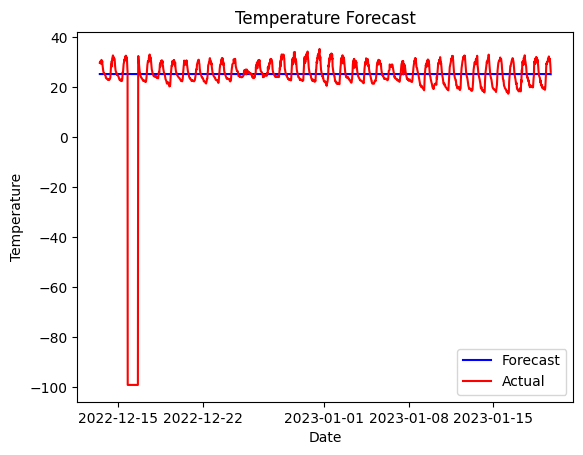

Date: 2023-05-20, Forecasted Temperature: 25.13
Date: 2023-05-21, Forecasted Temperature: 25.18
Date: 2023-05-22, Forecasted Temperature: 25.17
Date: 2023-05-23, Forecasted Temperature: 25.17
Date: 2023-05-24, Forecasted Temperature: 25.17
Date: 2023-05-25, Forecasted Temperature: 25.17
Date: 2023-05-26, Forecasted Temperature: 25.17
Date: 2023-05-27, Forecasted Temperature: 25.17
Date: 2023-05-28, Forecasted Temperature: 25.17
Date: 2023-05-29, Forecasted Temperature: 25.17
Date: 2023-05-30, Forecasted Temperature: 25.17
Date: 2023-05-31, Forecasted Temperature: 25.17
Date: 2023-06-01, Forecasted Temperature: 25.17
Date: 2023-06-02, Forecasted Temperature: 25.17
Date: 2023-06-03, Forecasted Temperature: 25.17


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
data = pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the 'AirTC' column as the target variable
target_variable = 'AirTC'
temperature_data = data[target_variable]

# Split the data into training and testing sets
train_size = int(len(temperature_data) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = temperature_data[:train_size], temperature_data[train_size:]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))  # (p, d, q) parameters of ARIMA model
model_fit = model.fit()

# Forecast future values
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model
predictions = forecast.values
actual_values = test_data.values

# Calculate the mean squared error
mse = np.mean((predictions - actual_values) ** 2)
print(f"Mean Squared Error: {mse}")

# Plot the forecasted and actual values
import matplotlib.pyplot as plt

plt.plot(test_data.index, predictions, color='blue', label='Forecast')
plt.plot(test_data.index, actual_values, color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast')
plt.legend()
plt.show()
forecast = model_fit.get_forecast(steps=15)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_confidence = forecast.conf_int()
last_date = temperature_data.index[0]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=15, freq='D')

# Print the forecasted values and dates
for date, value in zip(forecast_dates, forecast_values):
    print(f"Date: {date.date()}, Forecasted Temperature: {value:.2f}")

In [52]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the last column as the target variable
target_variable = data.columns[-1]
temperature_data = data[target_variable]

# Fit the ARIMA model
model = ARIMA(temperature_data, order=(1, 1, 1))  # (p, d, q) parameters of ARIMA model
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=15)

# Get the forecasted values and corresponding dates
forecast_values = forecast[0]
last_date = temperature_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=15, freq='D')

# Print the forecasted values and dates
for date, value in zip(forecast_dates, forecast_values):
    print(f"Date: {date.date()}, Forecasted Temperature: {value:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

KeyError: ignored

In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the temperature data
data = pd.read_csv('/content/SRM-DATA-FROM-JAN-1.csv')  # Assuming the data is stored in a CSV file

# Preprocess the data
data['date'] = pd.to_datetime(data['Date'])
data.set_index('date', inplace=True)

# Select the last column as the target variable
target_variable = data.columns[-1]
temperature_data = data[target_variable]

# Split the data into train and test sets
train_data = temperature_data[:-15]
test_data = temperature_data[-15:]

best_mse = float('inf')
best_order = None

# Grid search for optimal SARIMAX parameters
for p in range(3):
    for d in range(2):
        for q in range(3):
            order = (p, d, q)
            model = SARIMAX(train_data, order=order)
            model_fit = model.fit()
            forecast = model_fit.get_forecast(steps=15)
            forecast_values = forecast.predicted_mean
            mse = mean_squared_error(test_data, forecast_values)
            if mse < best_mse:
                best_mse = mse
                best_order = order

# Fit the SARIMAX model with the best parameters
model = SARIMAX(train_data, order=best_order)
model_fit = model.fit()

# Forecast future values
forecast = model_fit.get_forecast(steps=15)
forecast_values = forecast.predicted_mean

# Get the forecasted dates
last_date = temperature_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=15, freq='D')

# Print the forecasted values and dates
for date, value in zip(forecast_dates, forecast_values):
    print(f"Date: {date.date()}, Forecasted Temperature: {value:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Date: 2022-12-14, Forecasted Temperature: 1005.37
Date: 2022-12-15, Forecasted Temperature: 1005.37
Date: 2022-12-16, Forecasted Temperature: 1005.37
Date: 2022-12-17, Forecasted Temperature: 1005.37
Date: 2022-12-18, Forecasted Temperature: 1005.37
Date: 2022-12-19, Forecasted Temperature: 1005.37
Date: 2022-12-20, Forecasted Temperature: 1005.37
Date: 2022-12-21, Forecasted Temperature: 1005.37
Date: 2022-12-22, Forecasted Temperature: 1005.37
Date: 2022-12-23, Forecasted Temperature: 1005.37
Date: 2022-12-24, Forecasted Temperature: 1005.37
Date: 2022-12-25, Forecasted Temperature: 1005.37
Date: 2022-12-26, Forecasted Temperature: 1005.37
Date: 2022-12-27, Forecasted Temperature: 1005.37
Date: 2022-12-28, Forecasted Temperature: 1005.37


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
